## Kaggle data download 방법
- kaggle API key 필요

In [1]:
# key file upload
from google.colab import files
up = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os, json

with open('kaggle.json') as f:
    kaggle = json.load(f)
os.environ['KAGGLE_USERNAME'] = kaggle['username']
os.environ['KAGGLE_KEY'] = kaggle['key']

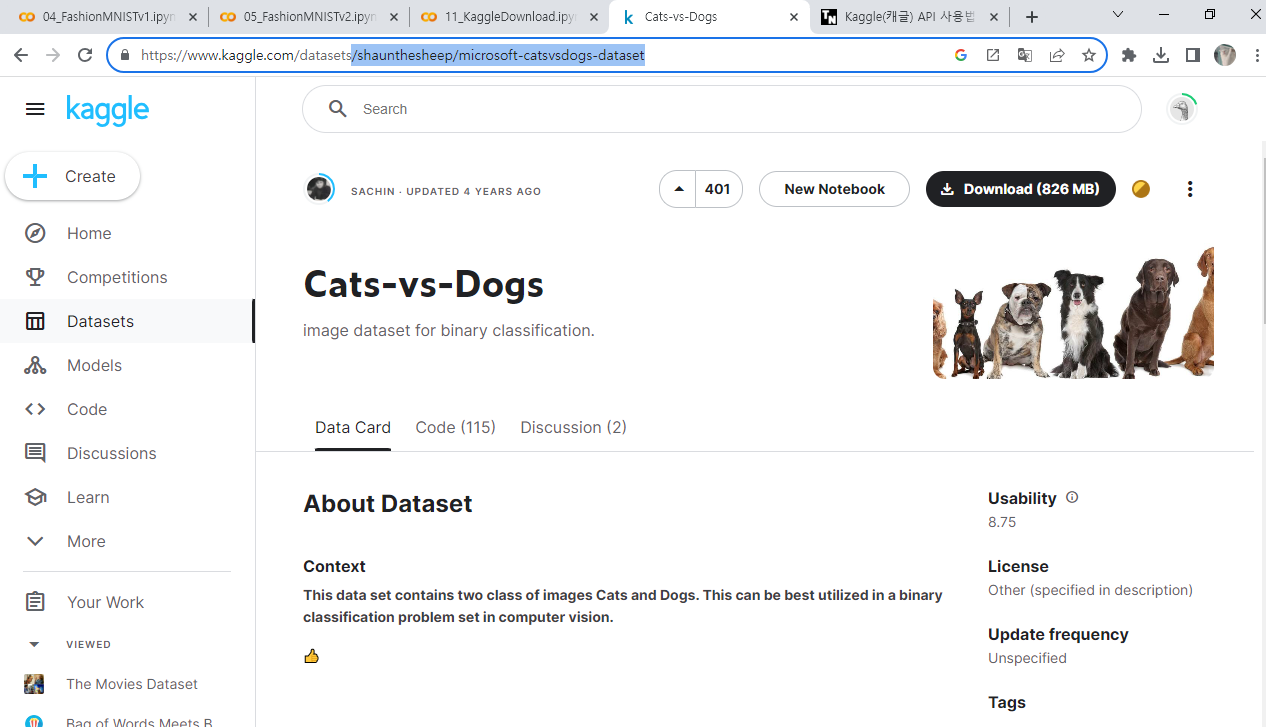

In [3]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 787M/788M [00:08<00:00, 234MB/s]
100% 788M/788M [00:08<00:00, 92.6MB/s]


In [4]:
!unzip microsoft-catsvsdogs-dataset.zip > filenames
  # 압축해제 후 파일 네임만 확인해보는 코드
  # 내가 다운받은 데이터셋 파일은 PetImages폴더 안에 있음

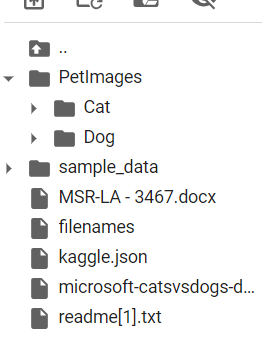

In [5]:
cat_dir = 'PetImages/Cat'
os.unlink(f'{cat_dir}/Thumbs.db')     # 압축 해제시 생성된 임시파일 삭제
cat_list = os.listdir(cat_dir)
len(cat_list)

12500

In [7]:
dog_dir = 'PetImages/Dog'
os.unlink(f'{dog_dir}/Thumbs.db')     # 압축 해제시 생성된 임시파일 삭제
dog_list = os.listdir(dog_dir)
len(dog_list)

12500

- 이미지 파일 에러 찾기

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from PIL import Image
from glob import glob

In [10]:
cat_list[:5]

['3956.jpg', '11096.jpg', '7388.jpg', '11637.jpg', '321.jpg']

In [12]:
# 어떤 파일에서 에러가 나는지 확인
for fname in cat_list:
  try:
    img = Image.open(f'PetImages/Cat/{fname}')
  except:
    print(fname)

666.jpg


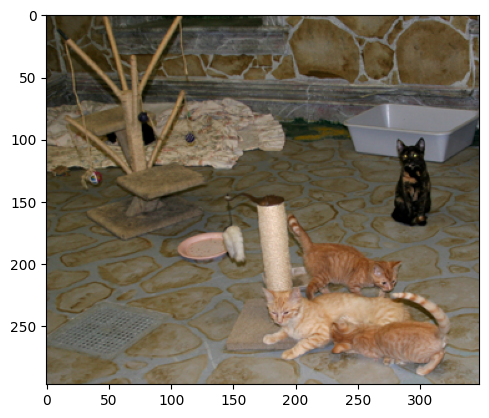

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img);

In [14]:
for fname in glob(f'{dog_dir}/*'):
  try:
    img = Image.open(fname)
  except:
    print(fname)

PetImages/Dog/11702.jpg


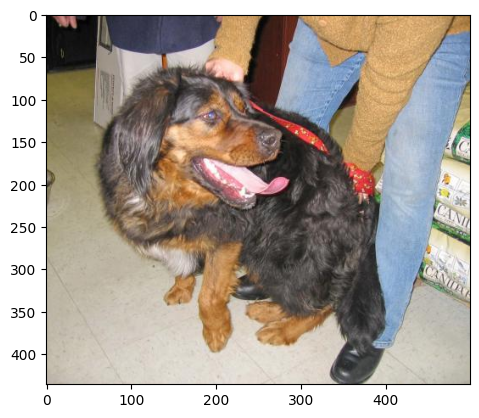

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img);

- train data: 0.jpg ~ 7999.jpg (8,000개)
- valid data: 8000.jpg ~ 9999.jpg (2,000개)
- test data: 10000.jpg ~ 12499.jpg (2,500개)

In [16]:
# 오류난 데이터 삭제
!cp PetImages/Cat/9999.jpg PetImages/Cat/666.jpg
!cp PetImages/Dog/9999.jpg PetImages/Dog/11702.jpg